### 🇧🇷 브라질 이커머스의 지리공간(Geospatial) 분석

Olist는 2016년부터 2018년 사이에 이루어진 약 10만 건의 주문 데이터를 공개했습니다.
각 주문에는 고객과 관련된 여러 정보가 포함되어 있으며, 고객 우편번호의 앞 세 자리도 들어 있습니다.
또한 Olist는 각 우편번호 앞 세 자리와 연결된 위도·경도(lng/lat) 좌표 32만 3천 개가 포함된 지리 위치(geolocation) 데이터베이스도 함께 제공했습니다.

또한 브라질 물류(Logistics)에 대해 작성된 포르투갈어 전문 보고서도 함께 공개했습니다.

### CEP: 브라질 우편번호

브라질 우편번호는 CEP(Código de Endereçamento Postal) 라고 불리며, 총 8자리 숫자로 구성됩니다.
1972년에 5자리 체계로 처음 도입되었고, 더 정밀한 위치 식별을 위해 1992년에 8자리 체계로 확장되었습니다.
표준 형식은 다음과 같습니다:

    "nnnnn-nnn"

    앞의 5자리

    하이픈(-)

    뒤의 3자리

    예시: CEP: 12.345-678

### CEP는 어떻게 배정될까?

    인구 10만 명 이상 도시는 거의 모든 공공장소와 대형 상업시설, 대규모 주거단지에 개별 CEP가 부여됩니다.

    소규모 도시(작은 마을)는 일반적으로 5자리 우편번호 + “-000” 형태의 하나의 CEP만 배정됩니다.


### CEP의 구성

    CEP는 두 부분으로 구성됩니다:

    ✔ 앞의 5자리 → 지역 구조를 나타냄

    각 자리는 다음을 의미합니다:

    Region(지역)

    Subregion(하위 지역)

    Sector(섹터)

    Subsector(하위 섹터)

    Subsector Splitter(세부 분할 단위)

    ✔ 뒤의 3자리 → 배달 구역(Distribution Identifiers)

    앞 5자리와 하이픈으로 구분되며, 실제 배송 구역을 더 좁게 구분하는 역할을 합니다.

    CEP 구조에 대한 더 자세한 정보는 브라질 우정공사(Correios) 웹사이트에서 확인할 수 있습니다.


### CEP는 지리적으로 어떻게 작동할까?

    이제 Olist가 제공한 지리 위치 데이터(geolocation dataset)를 살펴보며
    CEP가 실제 지리적으로 어떻게 배치되고 작동하는지 이해해 보겠습니다.

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 1 ｜ 데이터 불러오기
</div>

In [2]:
import numpy as np
import pandas as pd
import os

geo = pd.read_csv("C://Users//wkdal//DREW_PY//2025//Personal_Projects//Geospatial Analysis of Brazilian E-Commerce//olist_geolocation_dataset.csv//olist_geolocation_dataset.csv")

In [3]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 2 ｜ Data EDA : 브라질 우편 번호
</div>

In [4]:
geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(str)

In [5]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


In [6]:
# 우편 번호 탐색(우편번호의 앞 세 자리와 앞 네 자리를 추출한다. 이후 이 값들을 활용해 우편번호가 어떻게 작동하는지 더 자세히 살펴볼 것이다.)
geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix'].str[0:1]
geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix'].str[0:2]
geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix'].str[0:3]
geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix'].str[0:4]

In [7]:
geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_3_digits,geolocation_zip_code_prefix_4_digits
0,1037,-23.545621,-46.639292,sao paulo,SP,1,10,103,1037
1,1046,-23.546081,-46.644820,sao paulo,SP,1,10,104,1046
2,1046,-23.546129,-46.642951,sao paulo,SP,1,10,104,1046
3,1041,-23.544392,-46.639499,sao paulo,SP,1,10,104,1041
4,1035,-23.541578,-46.641607,sao paulo,SP,1,10,103,1035
...,...,...,...,...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS,9,99,999,9995
1000159,99900,-27.877125,-52.224882,getulio vargas,RS,9,99,999,9990
1000160,99950,-28.071855,-52.014716,tapejara,RS,9,99,999,9995
1000161,99980,-28.388932,-51.846871,david canabarro,RS,9,99,999,9998


In [8]:
geo['geolocation_zip_code_prefix'].value_counts().to_frame()

,count
geolocation_zip_code_prefix,
24220,1146
24230,1102
38400,965
35500,907
11680,879
...,...
57140,1
57604,1
57750,1


In [9]:
geo['geolocation_zip_code_prefix'].value_counts().to_frame().describe()

,count
count,19015.000000
mean,52.598633
std,72.057907
min,1.000000
25%,10.000000
50%,29.000000
75%,66.500000
max,1146.000000


### 브라질 우편번호(CEP)는 8자리

예) 22010-000

하지만 데이터셋에는 앞 5자리(Prefix)만 있다.

이 5자리는 지역구 단위로 묶여 있다. (정확한 장소가 아니라 구역, 동의 개념)

우편번호    위도          경도
--------------------------------------
22010      | -22.970... | -43.180...
22010      | -22.971... | -43.183...
22010      | -22.973... | -43.182...
...




    prefix는 “정확한 주소 1개”가 아니라 “넓은 지역 단위”

    geolocation.csv는 주소 하나당 하나의 lat/lng를 가지고 있음

    prefix 안에는 주소가 수십 ~ 수백 ~ 수천 개 존재

    그래서 prefix별 좌표 수(value_counts())는 매우 다양함


## 왜 중요할까?

    prefix가 얼마나 넓은 지역을 대표하는가?

    prefix별로 정확도가 얼마나 달라지는가?

    geolocation 데이터가 균형적으로 분포되어 있는가?


① value_counts()

→ 각 zip_code_prefix가 데이터셋에 몇 번 등장하는지 계산함.

예시

01037 → 52번 등장

22010 → 1146번 등장

54321 → 1번 등장

이런 식으로 prefix별 좌표 개수를 세는 것.

② .to_frame()

→ 결과를 DataFrame 형태(표)로 바꾸기
(그래야 describe()를 쓸 수 있음)

③ .describe()

→ pandas가 자동으로 다음 통계를 계산:

항목	의미
count	prefix 종류 개수 (= 19,015개)

mean	각 prefix당 평균 좌표 수 (= 52.598633)

std	표준편차 (prefix별 좌표 개수의 변동성)

min	가장 적은 좌표 수 (= 1개)

25%	1사분위 (= 10개)

50%	중앙값 (= 29개)

75%	3사분위 (= 66.5개)ㅡ

max	가장 많은 좌표 수 (= 1,146개)

### 해석
데이터셋 안에는 브라질 영토 밖에 위치한 이상치 좌표(outlier coordinates)들이 있다.
따라서 모든 좌표가 브라질 국경을 기준으로 설정된 사각형 범위 안에 포함되도록 정리하겠다.

In [10]:
# 브라질 국경 밖에있는 좌표들 제거
geo = geo[geo.geolocation_lat <= 5.27438888]
#이보다 위(북쪽)에 있는 좌표는 “브라질이 아니므로 제거”.
geo = geo[geo.geolocation_lng >= -73.98283055]
#이보다 더 서쪽(값이 더 작음)에 있는 좌표는 브라질 밖 → 제거.
geo = geo[geo.geolocation_lat >= -33.75116944]
#이보다 더 남쪽(값이 더 작음)은 브라질 밖 → 제거.
geo = geo[geo.geolocation_lng <=  -34.79314722]
#이보다 더 동쪽(값이 더 큼)은 브라질 밖 → 제거.

### 예상 이상치?

    - 좌표 입력 실수

    - 잘못 파싱된 값

    - 브라질 우편번호 prefix지만 실제 좌표가 엉뚱한 나라(예: 미국, 캐나다)에 찍힌 경우

    - 지도 API에서 잘못 매핑된 주소

### 위도/경도를 좌표계(x,y)로 변경

lnglat_to_meters
- (경도, 위도) → (x, y) 로 바꿔주는 함수
- 여기서 x, y는 Web Mercator(웹 메르카토르 투영) 라는 지도 좌표계에서 쓰는 단위(meter 단위 비슷).
- 위도/경도(lat/lng)는 구(지구) 표면 기준 좌표라 산점도, 히트맵, 타일맵 같은 시각화에서 바로 쓰기 불편할 수 있어서
- 메르카토르 좌표로 바꾸면 평면(x, y) 상에 지도를 그리기 쉬운 형태가 됩니다.

In [11]:
from datashader.utils import lnglat_to_meters as webm
x, y = webm(geo.geolocation_lng, geo.geolocation_lat)
geo['x'] = pd.Series(x)
geo['y'] = pd.Series(y)

In [12]:
geo.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_3_digits,geolocation_zip_code_prefix_4_digits,x,y
0,1037,-23.545621,-46.639292,sao paulo,SP,1,10,103,1037,-5.191862e+06,-2.698137e+06
1,1046,-23.546081,-46.644820,sao paulo,SP,1,10,104,1046,-5.192478e+06,-2.698193e+06
2,1046,-23.546129,-46.642951,sao paulo,SP,1,10,104,1046,-5.192270e+06,-2.698199e+06


✅ 1) lnglat_to_meters는 무엇을 하는 함수인가?

from datashader.utils import lnglat_to_meters as webm

x, y = webm(geo.geolocation_lng, geo.geolocation_lat)

    (1) 입력값

    geo.geolocation_lng → 경도(longitude) 값들의 시리즈

    geo.geolocation_lat → 위도(latitude) 값들의 시리즈

    (2) 하는 일

    lnglat_to_meters 함수는 위도(lat)/경도(lng)를
    Web Mercator(웹 메르카토르 투영) 좌표계의 x, y 값으로 변환하는 기능을 수행합니다.

    위도·경도는 본래 지구 위의 위치를 각도(°) 로 표현한 값이므로,
    지도 위에 점을 찍거나 datashader 같은 시각화 도구에서 사용하기에는 적합하지 않습니다.

    그래서 이 함수는 위도·경도를 다음과 같은 공식에 따라 평면 x, y 좌표로 변환합니다:

    x = R * lon_rad
    y = R * ln(tan(π/4 + lat_rad/2))


    lon_rad, lat_rad : 위도·경도를 라디안으로 변환한 값

    R : 지구 반지름에 해당하는 상수

    👉 한 줄 요약

    지도 위에 데이터를 시각화하기 좋도록
    위도/경도를 평면 좌표(x, y)로 변환하는 과정입니다.

✅ 2) pd.Series는 왜 사용하는가?
geo['x'] = pd.Series(x)
geo['y'] = pd.Series(y)


x, y 값은 lnglat_to_meters 함수의 반환 결과입니다.
일반적으로 이 값들은 NumPy 배열(np.ndarray) 형태입니다.

    예시:

    type(x)  # numpy.ndarray
    type(y)  # numpy.ndarray

    사실은 이렇게만 해도 됩니다:
    geo['x'] = x
    geo['y'] = y


    왜냐하면 pandas가 내부적으로 NumPy 배열을 자동으로 Series로 변환해주기 때문입니다.


그런데 굳이 pd.Series로 감싸는 이유는 무엇인가요?
✔ 1. pandas 객체임을 명확하게 표현하기 위해

변환된 결과를 DataFrame 컬럼으로 넣는 과정에서
명확하게 Series로 감싸는 방식을 선호하는 경우가 많습니다.

✔ 2. 인덱스를 맞추기 위해 (필요할 경우)

    예를 들어:

    pd.Series(x, index=geo.index)


    이런 방식으로 인덱스를 DataFrame의 기존 인덱스와 맞추는 경우가 있습니다.
    이번 코드에서는 인덱스를 명시하지 않았기 때문에:

    geo['x'] = pd.Series(x)


    이렇게 하면 0, 1, 2, … 기본 인덱스가 생성되고,
    geo DataFrame도 동일한 순서라면 정상적으로 데이터를 넣을 수 있습니다.

👉 결론

NumPy 배열을 pandas Series로 변환하여,
DataFrame의 새로운 컬럼(x, y)으로 안정적으로 추가하기 위한 목적입니다.

기술적으로는 geo['x'] = x와 거의 동일하게 동작하지만,
보다 “pandas스러운 방식”으로 정리한 코드라고 이해하시면 됩니다.

# 브라질 우편번호(Zip code) 체계가 어떻게 공간적으로 분포하는가?

이제 좌표들을 지도에 표시해 보면, 우편번호 앞자리(prefix)와 실제 지역 위치가 서로 관련되어 있음을 확인할 수 있습니다.

브라질의 우편번호는 상파울루에서 시작하며,prefix 010001부터 시작합니다.

그리고 숫자가 반시계 방향으로 증가하여, 브라질 남부의 히우 그란지 두술 지역에서 prefix 99990으로 끝납니다.

In [13]:
# 우편번호 정수형 변환

geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(int)
geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix_1_digits'].astype(int)
geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix_2_digits'].astype(int)
geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix_3_digits'].astype(int)
geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix_4_digits'].astype(int)


In [14]:
# 브라질 전체 우편번호 prefix 컬럼에 대해 통계 요약
brazil = geo
agg_name = 'geolocation_zip_code_prefix'
brazil[agg_name].describe().to_frame()


,geolocation_zip_code_prefix
count,1.000121e+06
mean,3.657332e+04
std,3.054939e+04
min,1.001000e+03
25%,1.107500e+04
50%,2.653000e+04
75%,6.350400e+04
max,9.999000e+04


Holoviews + Geoviews + Datashader import 설명 (목적 중심)
import holoviews as hv
import geoviews as gv
import datashader as ds

👉 Holoviews (hv)

대규모 데이터를 인터랙티브한 시각화 객체로 만들기 위한 라이브러리

bokeh, matplotlib 같은 backend 위에서 동작

“점 데이터 → 맵 위 점 포인트” 같은 구조 표현에 적합

👉 Geoviews (gv)

Holoviews 기반의 지도 전용 시각화 라이브러리

OpenStreetMap, ArcGIS 같은 배경지도(WMTS)를 쉽게 불러올 수 있음

좌표계(x,y)로 지도에 올릴 수 있게 해줌

👉 Datashader (ds)

수십만~수백만 개의 좌표 데이터를 빠르게 raster 이미지로 집계

지도 위에 찍힌 수많은 포인트를 부드럽게 표현할 때 사용됨

Holoviews + Datashader는 대규모 geospatial 분석의 정석 조합

from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr

👉 colorcet 팔레트

datashader에서 쓸 색상 팔레트

rainbow, fire 등은 지리적 밀도 / 값 차이를 표현하기 좋음

from datashader.colors import colormap_select, Greys9

👉 colormap 관련 툴

특정 컬러맵 선택

Greys9 → 기본 회색조 팔레트

from holoviews.streams import RangeXY

👉 RangeXY

사용자가 지도에서 "줌/이동"할 때

현재 화면의 x 범위, y 범위를 동적으로 읽어오는 스트림

hover 기능을 “현재 확대된 영역 기준”으로 업데이트하는 데 필수

from holoviews.operation.datashader import datashade, dynspread, rasterize

👉 datashader와 holoviews를 연결하는 핵심 연산들
함수	역할
datashade	대규모 포인트 데이터를 raster 이미지로 변환
dynspread	너무 작은 점이 없어지지 않도록 확대 퍼트림
rasterize	확대/이동 시점에 따라 다시 집계하는 hover 레이어 생성
from bokeh.io import push_notebook, show, output_notebook

👉 bokeh 출력 설정

Jupyter Notebook 안에서 interactive plot이 보이게 함

### 1. 이 코드가 필요한 이유 (핵심 목적)

Olist 데이터에서 브라질 전역의 고객 위치(x, y)를 시각화하면 점(좌표)이 30만~100만 개 이상 됩니다.

    ➡ 일반 matplotlib, seaborn으로는 렌더링이 너무 느리고 깨집니다
    ➡ 줌(zoom), 팬(pan), hover(마우스 오버)도 불가능합니다
    ➡ 병렬 집계 없이 모든 점을 그리면 지도가 시커멓게 뭉개집니다

    이런 문제를 해결하기 위해 이 코드가 등장한 것입니다.

    이 코드의 궁극적 목적

    “브라질 전역에 퍼진 수십만 개 좌표를 빠르게, 정확하게, 인터랙티브하게 지도 위에 시각화하기 위해”

이를 위해 세 가지 기술을 조합합니다:

    ✔ HoloViews → 인터랙티브 시각화
    ✔ GeoViews → 지도 기반 시각화
    ✔ DataShader → 수십만~수백만 포인트를 GPU 수준 속도로 렌더링
    ✔ Bokeh → Notebook에서 줌/팬/호버 가능한 지도 표현

    이 네 가지가 합쳐진 것이 바로 이 코드입니다.

1) 1단계: 필요한 라이브러리 불러오기

    import holoviews as hv
    import geoviews as gv
    import datashader as ds

    왜 필요한가?
    라이브러리	역할
    HoloViews	Bokeh와 DataShader를 연결해줌 (인터랙티브 시각화 엔진)
    GeoViews	지도 타일(WMTS) + 좌표 처리
    DataShader	수십만~수백만 점을 빠르게 “집계 이미지(raster)”로 변환

    일반 scatterplot은 개수가 많으면 터져버리지만
    datashader는 픽셀 단위 집계를 하기 때문에
    빠르고 정확하게 밀도 기반 시각화가 가능합니다.

2) 2단계: 색상 팔레트 불러오기

    from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr


    지도 위에서 밀도·값을 표현하려면 색상이 필요합니다. DataShader는 colorcet 팔레트를 많이 사용합니다.

3) 3단계: DataShader와 색상 도구 로드

   from datashader.colors import colormap_select, Greys9

    여러 colormap을 선택할 때 사용됩니다.


4) 4단계: 지도 범위를 읽어오기 위한 RangeXY stream

    from holoviews.streams import RangeXY 이것의 의미를 잘 이해해야 합니다.

    - 사용자가 마우스 스크롤로 확대하면?

    - 지도에서 특정 지역으로 이동하면?

    그 새로운 범위를 실시간으로 읽어와야 해당 부분만 datashader가 다시 계산해서 보여줄 수 있습니다.

    ➡ 이것이 없으면 hover 기능, zoom 반응형 렌더링 불가능

5) 5단계: datashader 연산 불러오기

    from holoviews.operation.datashader import datashade, dynspread, rasterize

    이 세 가지는 역할이 다릅니다:
    함수	    역할
    datashade	수십만 점을 집계하여 하나의 raster 이미지로 만듦
    dynspread	너무 작은 점은 확대해줌 (사라지는 문제 해결)
    rasterize	hover 등 상호작용을 위한 저해상도 raster 생성

    특히 dynspread는 아주 중요함. 점이 너무 몰려 있어서 한 픽셀로 뭉개지는 것을 해결함.

6) 6단계: Bokeh Notebook 설정

    output_notebook()
    hv.extension('bokeh')


    HoloViews는 backend(엔진)를 선택해야 하는데, 여기서는 Bokeh를 사용함.

    hover 가능

    zoom/pan 가능

    그래서 지도 시각화에 최적.

7) 7단계: 시각화 옵션 설정

    %opts Overlay [...]
    %opts QuadMesh [...]


    Overlay: 전체 지도 스타일 설정

    QuadMesh: hover 시 동작 및 투명도 설정

    즉, “default view”를 잡아주는 부분.

8) 8단계: 주요 파라미터 설정

    T = 0.05   # dynspread threshold
    PX = 1     # 확장할 픽셀 크기


    datashader로 만든 이미지가 너무 뭉치면 안 보이므로, dynspread로 점을 조금씩 확장해준다.

9) 9단계: plot_map 함수

    이 함수는 브라질 지도 + 데이터 집계 이미지 + hover 정보를 한 번에 합성해주는 “완성된 시각화 함수”입니다.

    ① ArcGIS 지도 타일 불러오기
    url="http://...Dark_Gray_Base..."
    geomap = gv.WMTS(url)


    왜?

    지도 배경이 없으면 x, y 좌표만 보임 → 의미 없음

    Dark Gray는 데이터가 눈에 잘 띄는 지도 스타일

    ② 포인트 데이터 생성

    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))


    여기서:

    kdims = key dimensions → x, y 좌표

    vdims = value dimensions → 칠할 값 (예: zip_code_prefix)

    ③ DataShader로 데이터 집계 이미지 생성

    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)


    이 단계가 가장 중요합니다.

    ❗ 수십만 좌표를 일일이 scatterplot으로 찍지 않고
    ➡ pixel 단위 집계 (density)로 렌더링합니다.

    그래서 빠름 + 선명함 + 왜곡 없음.

    ④ dynspread로 점 확장
    zip_codes = dynspread(agg, threshold=T, max_px=PX)


    datashader는 점이 너무 촘촘하면 하나의 픽셀로 뭉개집니다.
    dynspread는 밀도 기반으로 점을 펼쳐서 “보이게” 만듭니다.

    ⑤ hover 추가 (상호작용 기능)
    hover = hv.util.Dynamic(
        rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]),
        operation=hv.QuadMesh
    )


    datashader는 hover(마우스 오버) 값을 기본적으로 제공하지 않습니다.
    그래서 따로 “작은 rasterized 이미지”를 만들어 hover만 처리합니다.

    ➡ 확대/축소해도 hover가 정확하게 작동
    ➡ 지도 탐색이 가능해짐

    ⑥ 지도 + 데이터 + hover 레이어 합성
    img = geomap * zip_codes * hover


    Overlay로 세 개 층을 하나의 지도처럼 보이게 함.

    ⑦ 제목(label) 추가 후 반환
    img = img.relabel(label)
    return img


Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
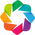

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27500\946886615.py:40: HoloviewsDeprecationWarning: IPython magic is deprecated and will be removed in version 1.23.0.
  get_ipython().run_line_magic('opts', "Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]")
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27500\946886615.py:43: HoloviewsDeprecationWarning: IPython magic is deprecated and will be removed in version 1.23.0.
  get_ipython().run_line_magic('opts', "QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)")


In [15]:
# ───────────────────────────────────────────────
# 1) 지도 기반 대규모 데이터 시각화를 위한 라이브러리 import
# ───────────────────────────────────────────────

import holoviews as hv              # 대규모 데이터 인터랙티브 시각화 라이브러리
import geoviews as gv               # 지도 시각화 전용(HoloViews 확장) — 배경지도 제공
import datashader as ds             # 수십~수백만 점을 빠르게 raster 이미지로 집계하는 라이브러리

from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
# datashader/holoviews에서 사용할 고품질 색상 팔레트 세트

from datashader.colors import colormap_select, Greys9
# colormap 선택 함수 + 기본 회색 팔레트

from holoviews.streams import RangeXY
# 지도 확대/이동 시 현재 화면 범위(xMin,xMax,yMin,yMax)를 실시간으로 받아오는 스트림

from holoviews.operation.datashader import datashade, dynspread, rasterize
# datashader와 holoviews를 연결하는 주요 연산
# datashade → 포인트를 raster 이미지로 변환
# dynspread → 작은 점이 보이도록 퍼트림
# rasterize → zoom/범위에 따라 지속적으로 집계되는 hover 레이어 생성

from bokeh.io import push_notebook, show, output_notebook
# Jupyter notebook 환경에서 bokeh 기반 플롯을 표시하기 위한 함수들


# ───────────────────────────────────────────────
# 2) 노트북(bokeh backend) 사용 설정
# ───────────────────────────────────────────────

output_notebook()                   # Jupyter Notebook 내부에 시각화 결과 표시 활성화
hv.extension('bokeh')               # Holoviews를 bokeh backend로 사용하겠다는 선언


# ───────────────────────────────────────────────
# 3) 기본 플롯 옵션 정의
# ───────────────────────────────────────────────

%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
# Overlay된 모든 그래프 레이어의 기본 크기, 툴바 위치, x/y축 제거(지도 표시를 깔끔하게 하기 위함)

%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)
# hover를 지원하는 raster 이미지 설정
# alpha=0 → 기본은 투명 / hover 시 hover_alpha=0.2로 강하게 표시됨


# ───────────────────────────────────────────────
# 4) datashader 설정값
# ───────────────────────────────────────────────

T = 0.05                           # dynspread가 점을 퍼트릴 때 사용할 임계값
PX = 1                             # 한 점을 최대 몇 픽셀까지 확장할지 설정


# ───────────────────────────────────────────────
# 5) 지도 + 데이터 포인트를 하나의 시각화 객체로 만드는 함수 정의
# ───────────────────────────────────────────────

def plot_map(data, label, agg_data, agg_name, cmap):
    """
    data     : x, y 좌표 및 집계에 사용할 값(agg_name)을 포함한 DataFrame
    label    : 플롯 제목
    agg_data : datashader 집계 방식 (예: ds.mean('zipcode'), ds.count())
    agg_name : 색상으로 표현할 데이터 컬럼명 (vdim)
    cmap     : 색상 팔레트
    """

    # ArcGIS에서 제공하는 세계지도 타일 (Dark Gray Base) URL
    url = "http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"

    # WMTS 방식으로 타일 서버에서 배경지도 가져오기
    geomap = gv.WMTS(url)

    # x, y 좌표 + 색상 기준값을 HoloViews Points 객체로 구성
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))

    # datashader로 대규모 점 데이터를 raster 이미지로 변환
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)

    # 점이 너무 작아서 보이지 않는 것을 방지하기 위해 확대(dynspread)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)

    # zoom/이동 시 hover 정보를 동적으로 다시 계산하기 위한 rasterize
    hover = hv.util.Dynamic(
        rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]),
        operation=hv.QuadMesh
    )

    # hover 색상맵 적용
    hover = hover.options(cmap=cmap)

    # 배경지도 + raster 이미지 + hover를 overlay하는 최종 시각화
    img = geomap * zip_codes * hover

    # 그래프 제목 지정
    img = img.relabel(label)

    return img


# ───────────────────────────────────────────────
# 6) 함수 실행 예시
# ───────────────────────────────────────────────

# ex) zip code prefix를 가진 브라질 geolocation 데이터
brazil = geo
agg_name = 'geolocation_zip_code_prefix'



In [16]:
# 브라질 우편번호 prefix를 지도 위 히트맵으로 시각화
plot_map(
    data=brazil,                     # ① 지도 위에 표시할 전체 브라질 지오데이터프레임 (x, y 포함)
    label='브라질 전체 우편번호',        # ② 시각화 제목(Plot 이름)
    agg_data=ds.mean(agg_name),      # ③ 동일 zip_code_prefix별 평균값을 계산하는 datashader 집계 방식
    agg_name=agg_name,               # ④ 색상 값으로 사용할 컬럼명 (zip_code_prefix)
    cmap=rainbow                     # ⑤ zip code 구간을 색상으로 표현하기 위한 색상 팔레트
)


:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

⃣1. ZIP prefix는 지리적 순서를 가지고 있다

    브라질 우편번호는 상파울루(01001)에서 시작해, 남부 Rio Grande do Sul(99990)로 갈수록 증가하는 패턴을 보임.

    그래서 색상이 지도 상에서 “흐르는 듯한” 변화가 나타남.

2️. 인구 밀집지역(도시권)에서 점이 매우 많다

    특히 아래 지역이 매우 촘촘하게 보임:

    São Paulo (SP)

    Rio de Janeiro (RJ)

    South Region (RS, SC, PR)

    이는 Olist e-commerce 주문이 대도시에 집중되어 있음을 그대로 반영함.

3. 북부·내륙 지역은 우편번호 좌표가 적다

    브라질 아마존·내륙 지역은 점이 희박함 → 실제 배송/물류가 어려운 지역.

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 2-1 ｜ Data EDA : 주 단위 우편 번호
</div>

# 주별 우편번호 구조는 어떠한가?

- 상파울루(Sao Paulo, SP) 주를 예로 들어, 지역 단위에서 우편번호(prefix)가 어떻게 구성되는지 살펴보겠습니다. 확인해 보면 다음과 같습니다.

- 상파울루 주의 우편번호(prefix)는 01001부터 19990까지 분포합니다.

- 우편번호가 0으로 시작하면 상파울루 광역도시권(도심권)에 위치합니다.

- 우편번호가 1로 시작하면 상파울루 주의 내륙 지역에 위치합니다.

In [17]:
# 특정 지역(state, city, zip_code_prefix 등)을 기준으로 데이터 필터링

# 그 지역 내에서 비정상적으로 튀는 좌표값(x/y)을 제거하여 지도 시각화가 깨지지 않도록 보정

def filter_data(level, name):
    # geo 데이터에서 특정 컬럼(level)이 특정 값(name)과 일치하는 행만 필터링
    df = geo[geo[level] == name]

    # x좌표에서 극단값(outlier)을 제거 (상위 0.1%, 하위 0.1% 제외)
    df = df[(df.x <= df.x.quantile(0.999)) & (df.x >= df.x.quantile(0.001))] #quantile()은 데이터를 0~1 사이의 분위(percentile) 기준으로 나누어 특정 지점을 반환하는 함수
                                                                            #quantile(0.001) → 아래쪽 0.1% 지점, quantile(0.999) → 위쪽 0.1% 지점
    # y좌표에서 극단값(outlier)을 제거 (상위 0.1%, 하위 0.1% 제외)
    df = df[(df.y <= df.y.quantile(0.999)) & (df.y >= df.y.quantile(0.001))]

    # 필터링된 데이터 반환
    return df


In [18]:
sp = filter_data('geolocation_state', 'SP')
agg_name = 'geolocation_zip_code_prefix'
sp[agg_name].describe().to_frame()

# SP = São Paulo 주

# RJ = Rio de Janeiro 주

# MG = Minas Gerais 주

# RS = Rio Grande do Sul 주

# BA = Bahia 주

,geolocation_zip_code_prefix
count,402651.000000
mean,9030.831782
std,5101.941134
min,1001.000000
25%,4661.000000
50%,8257.000000
75%,13330.000000
max,19990.000000


In [19]:
plot_map(
    sp,                                 # data: 상파울루(SP) 주 데이터프레임 (x, y, prefix 포함)
    '상파울루 주 부근, 도심/내륙 (최소값) 분포',     # label: 최종 시각화 제목
    ds.min(agg_name),                   # agg_data: ZIP prefix의 최소값을 집계 기준으로 사용, (최솟값 : 하나의 위치에 여러 건의 데이터)
    agg_name,                           # agg_name: 색상 표시에 사용할 컬럼명 ('geolocation_zip_code_prefix')
    cmap=rainbow                        # cmap: 컬러맵 — rainbow 팔레트 적용
)


:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

색이 점점 노란색·주황색·붉은색으로 이동 = 내륙으로 갈수록 prefix 증가

상파울루 주의 서쪽·북쪽으로 갈수록 ZIP prefix 숫자가 커짐.

점이 조금씩 퍼져 있고 밀도가 낮아짐.

→ 외곽, 교외, 농촌 지역으로 갈수록 높은 ZIP 번호 사용

In [20]:
plot_map(
    sp,                      # data: 상파울루(SP) 주의 geolocation 데이터(df)
    '상파울루 주 부근, 도심/내륙 (평균) 분포',          # label: 시각화 제목 (플롯 이름)
    ds.mean(agg_name),       # agg_data: ZIP prefix 값들의 평균을 색상 기준으로 집계
    agg_name,                # agg_name: 색칠에 사용할 컬럼명 ('geolocation_zip_code_prefix')
    cmap=rainbow             # cmap: rainbow 컬러맵으로 색상 표현
)


:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 2-3 ｜ Data EDA : 대도시의 우편 번호
</div>

# 대도시 내 우편번호 구조 분석

대도시의 우편번호 구조

    - 상파울루(Sao Paulo) 시 단위에서 우편번호(prefix)가 어떻게 배치되어 있는지 살펴보자. 분석 결과는 다음과 같다:

    - 상파울루 시의 우편번호(prefix)는 01001에서 09540까지 범위 안에 있다.

    - 우편번호(prefix)는 도시의 ‘동네(Neighborhood)’ 또는 ‘행정구역(District)’과 어느 정도 연관되어 있다.

    - 즉, 우편번호 숫자가 단순한 번호가 아니라 도시 내 구역(동/구)을 반영해 체계적으로 배치된 구조라는 의미다.

✔ 사용된 함수 설명
filter_data(level, name)

level: 어떤 컬럼 기준으로 필터링할지 (예: 'geolocation_city')

name: 선택할 값 (예: 'sao paulo')

✔ 왜 사용하는가?

도시 단위에서 우편번호 패턴을 분석하기 위함

브라질 전체 → SP 주 → 상파울루 시로 “점점 더 좁혀가는 분석 단계”

✔ filter_data 내부에서는 무엇을 하나?

해당 조건(level == name)으로 필터링

그 뒤 상하위 0.1% 극단값(x, y) 제거
→ 지도 시각화 시 이상치(outliers)로 인해 화면이 찌그러지는 것을 방지하기 위해

In [21]:
saopaulo = filter_data('geolocation_city', 'sao paulo')   # geo 데이터에서 geolocation_city == 'sao paulo' 인 행만 필터링하여 상파울루 시 데이터만 추출

agg_name = 'geolocation_zip_code_prefix'                  # 분석에 사용할 컬럼명(우편번호 prefix)을 변수로 지정

saopaulo[agg_name].describe().to_frame()                  # 상파울루의 ZIP prefix 통계값(count, mean, min~max 등)을 DataFrame 형태로 출력


,geolocation_zip_code_prefix
count,135256.000000
mean,4137.454996
std,1804.189554
min,1001.000000
25%,2941.000000
50%,4166.000000
75%,5158.000000
max,9540.000000


In [22]:
plot_map(saopaulo, '상파울루 주 지역별 우편번호 (최소값) 분포', ds.min(agg_name), agg_name, cmap=rainbow)


:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

In [23]:
plot_map(
    saopaulo,                          # data: 상파울루 시의 위도/경도 + ZIP prefix 데이터프레임
    '상파울루 주 지역별 우편번호 (평균) 분포',   # label: 그래프 제목(지도에 표시될 이름)
    ds.mean(agg_name),                 # agg_data: ZIP prefix 값을 평균으로 집계해 색으로 표현
    agg_name,                          # agg_name: 색상값에 사용할 컬럼명('geolocation_zip_code_prefix')
    cmap=rainbow                       # cmap: 시각화에 사용할 색상 팔레트(rainbow)
)


:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 2-4 ｜ Data EDA : 소도시의 우편번호
</div>

# 소도시의 우편번호 구조

이제 아티바이아(Atibaia)라는 소도시를 예로 들어, 우편번호(prefix)가 도시 단위에서 어떻게 작동하는지 살펴보겠습니다. 분석 결과는 다음과 같습니다:

    - 아티바이아 시의 우편번호(prefix)는 12940부터 12954 사이에 분포합니다.

    - 하지만 인근의 다른 소도시들도 동일한 우편번호(prefix)를 공유합니다.

    - 도시 내부 구역까지 더 세밀하게 구분하려면, 우편번호의 4번째·5번째 자리(즉, 더 긴 ZIP 코드)가 필요할 것입니다.

In [24]:
atibaia = geo[geo['geolocation_city'] == 'atibaia']
agg_name = 'geolocation_zip_code_prefix'
atibaia[agg_name].describe().to_frame()

,geolocation_zip_code_prefix
count,1254.000000
mean,12945.042265
std,4.197704
min,12940.000000
25%,12942.000000
50%,12944.000000
75%,12948.000000
max,12954.000000


In [25]:
plot_map(atibaia, '아타바디아 우편번호', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 3 ｜ 대부분 어느 지역에서 가장 많은 매출이 발생할까요?
</div>

우편번호 전체 5자리를 사용하면, 일부 지역에서는 표본 수가 너무 작아질 수 있습니다.
따라서 여기서는 우편번호 앞 3자리(prefix) 를 기준으로 분석을 진행합니다.

    우편번호(prefix)별로 상품 판매액을 합산하여 시각화해보면 다음과 같은 결과를 확인할 수 있습니다:

    브라질 남동부(Southeast)와 남부(South) 지역이 전체 매출의 대부분을 차지합니다.

    인구가 많은 대도시 및 주도(州都)에서 매출 기여도가 훨씬 큽니다.

    즉, 인구 밀집 지역일수록 매출 비중이 높게 나타난다는 것을 보여줍니다.


<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 3 ｜ 데이터 불러오기
</div>



In [26]:
orders_df = pd.read_csv('C://Users//wkdal//DREW_PY//2025//Personal_Projects//Geospatial Analysis of Brazilian E-Commerce//olist_orders_dataset.csv//olist_orders_dataset.csv')
order_items = pd.read_csv('C://Users//wkdal//DREW_PY//2025//Personal_Projects//Geospatial Analysis of Brazilian E-Commerce//olist_order_items_dataset.csv//olist_order_items_dataset.csv')
order_reviews = pd.read_csv('C://Users//wkdal//DREW_PY//2025//Personal_Projects//Geospatial Analysis of Brazilian E-Commerce//olist_order_reviews_dataset.csv//olist_order_reviews_dataset.csv')
customer = pd.read_csv('C://Users//wkdal//DREW_PY//2025//Personal_Projects//Geospatial Analysis of Brazilian E-Commerce//olist_customers_dataset.csv//olist_customers_dataset.csv', dtype={'customer_zip_code_prefix': str})


<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 3 ｜ Data Processing & EDA : 브라질 지역별 매출 살펴보기
</div>



In [27]:
# 고객 우편번호 앞 3자리만 따로 추출해서 정수형으로 만듭니다.
customer['customer_zip_code_prefix_3_digits'] = customer['customer_zip_code_prefix'].str[0:3]
customer['customer_zip_code_prefix_3_digits'] = customer['customer_zip_code_prefix_3_digits'].astype(int)

customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_zip_code_prefix_3_digits
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,144
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP,97
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP,11
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP,87
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,130


In [28]:
# 브라질 좌표 데이터 인덱스 변경
brazil_geo = geo.set_index('geolocation_zip_code_prefix_3_digits').copy()
brazil_geo.head() #DataFrame 내부의 특정 컬럼을 인덱스로 바꾼 다음 복사합니다.

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_4_digits,x,y
geolocation_zip_code_prefix_3_digits,,,,,,,,,,
103,1037,-23.545621,-46.639292,sao paulo,SP,1,10,1037,-5.191862e+06,-2.698137e+06
104,1046,-23.546081,-46.644820,sao paulo,SP,1,10,1046,-5.192478e+06,-2.698193e+06
104,1046,-23.546129,-46.642951,sao paulo,SP,1,10,1046,-5.192270e+06,-2.698199e+06
104,1041,-23.544392,-46.639499,sao paulo,SP,1,10,1041,-5.191885e+06,-2.697988e+06
103,1035,-23.541578,-46.641607,sao paulo,SP,1,10,1035,-5.192120e+06,-2.697646e+06


In [29]:
# 주문 + 고객 + 리뷰 데이터를 병합합니다.
orders = orders_df.merge(order_items, on='order_id')
orders = orders.merge(customer, on='customer_id')
orders = orders.merge(order_reviews, on='order_id')

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_zip_code_prefix,customer_city,customer_state,customer_zip_code_prefix_3_digits,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,03149,sao paulo,SP,31,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,47813,barreiras,BA,478,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,75265,vianopolis,GO,752,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,59296,sao goncalo do amarante,RN,592,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,09195,santo andre,SP,91,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [30]:
# gp = 지역별 매출 집계 테이블 생성 합니다.
# 고객 우편 번호별로 총 매출(Price 합계)를 구합니다. (왜? 나중에 지역별 매출을 지도 위에 표시)
gp = orders.groupby('customer_zip_code_prefix_3_digits')['price'].sum().to_frame()

# revenue = 좌표+매출이 합쳐진 최종 테이블입니다.
# brazil_geo 데이터는 위도 x 경도 y값이 있습니다.
revenue = brazil_geo.join(gp)
agg_name = 'revenue'
revenue[agg_name] = revenue.price / 1000

In [31]:
revenue.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_4_digits,x,y,price,revenue
geolocation_zip_code_prefix_3_digits,,,,,,,,,,,,
103,1037,-23.545621,-46.639292,sao paulo,SP,1,10,1037,-5.191862e+06,-2.698137e+06,NaN,NaN
104,1046,-23.546081,-46.644820,sao paulo,SP,1,10,1046,-5.192478e+06,-2.698193e+06,NaN,NaN
104,1046,-23.546129,-46.642951,sao paulo,SP,1,10,1046,-5.192270e+06,-2.698199e+06,NaN,NaN
104,1041,-23.544392,-46.639499,sao paulo,SP,1,10,1041,-5.191885e+06,-2.697988e+06,NaN,NaN
103,1035,-23.541578,-46.641607,sao paulo,SP,1,10,1035,-5.192120e+06,-2.697646e+06,NaN,NaN


In [32]:
plot_map(revenue, '브라질 지역별 매출 (thousands R$)', ds.mean(agg_name), agg_name, cmap=fire)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y revenue)

### 결과 해석

매출은 브라질 남동부 지역에 압도적으로 집중했습니다.

    - 지도에서 가장 밝은 영역은 São Paulo(SP), Rio de Janeiro(RJ), Minas Gerais(MG)로 구성된 브라질 남동부 권역입니다.

        - 이 지역은 브라질 인구의 약 45%가 거주했으며, 산업과 금융 그리고 상업 중심지입니다.

    - 남부 지역인 Paraná(PR), Santa Catarina(SC), Rio Grande do Sul(RS)에는 높은 매출을 나타냅니다.

        - 주로 중산층의 비율이 높은 지역입니다.


    - 북부, 북동부 지역은 비교적 매출이 낮습니다.

        - 이 지역들은 아마존 지역이 대부분 차지합니다.


<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 4 ｜ 평균 구매 가격은 얼마인가요?
</div>

여기서는 다소 예상 밖의 결과를 확인할 수 있습니다.

브라질 남부와 남동부 지역의 고객들은 북부와 북동부 지역 고객들보다 평균 주문 금액(average ticket) 이 더 낮게 나타납니다.

이러한 현상은 남부·남동부 고객들이 더 높은 배송비(freight) 를 부담해야 하기 때문에 발생했을 가능성이 있습니다.

(이 부분은 곧 이어서 확인해 보겠습니다.)

In [33]:
gp = orders.groupby('order_id').agg({'price': 'sum', 'customer_zip_code_prefix_3_digits': 'max'})
gp = gp.groupby('customer_zip_code_prefix_3_digits')['price'].mean().to_frame()
avg_ticket = brazil_geo.join(gp)
agg_name = 'avg_ticket'
avg_ticket[agg_name] = avg_ticket.price
gp.head()

,price
customer_zip_code_prefix_3_digits,
10,159.935442
11,125.330571
12,146.777193
13,123.024722
14,147.127605


In [34]:
# 주문번호(order_id)별로 묶어서
# ① price는 합계(한 주문의 총 금액)
# ② 고객 우편번호 앞 3자리(max로 하나 선택)를 가져옵니다.
gp = orders.groupby('order_id').agg({
    'price': 'sum',
    'customer_zip_code_prefix_3_digits': 'max'
})

# 우편번호(앞 3자리)별로 다시 묶어서
# 해당 지역 고객의 평균 주문금액(average ticket)을 계산합니다.
# 결과는 dataframe 형태(to_frame)로 변환합니다.
gp = gp.groupby('customer_zip_code_prefix_3_digits')['price'].mean().to_frame()

# 브라질 ZIP prefix별 좌표 데이터(brazil_geo)에
# 평균 주문금액 테이블(gp)을 ZIP prefix 인덱스를 기준으로 join합니다.
# → 지도 시각화에 사용 가능한 데이터셋 생성
avg_ticket = brazil_geo.join(gp)

# plot_map()에서 사용할 값 컬럼 이름을 지정합니다.
agg_name = 'avg_ticket'

# join으로 들어온 'price' 컬럼을 avg_ticket으로 복사합니다.
# (plot_map 함수는 agg_name 컬럼을 필요로 하기 때문)
avg_ticket[agg_name] = avg_ticket.price

# 평균 주문금액 테이블 상위 5개 행 확인
gp.head()


,price
customer_zip_code_prefix_3_digits,
10,159.935442
11,125.330571
12,146.777193
13,123.024722
14,147.127605


In [35]:
plot_map(avg_ticket, '평균 주문 가격 (R$)', ds.mean(agg_name), agg_name, cmap=bgy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y avg_ticket)

### 결과 해석
남동부는 물류비가 낮아 소액 다회 구매 → 평균 주문 금액 낮음

북부·북동부는 배송비와 상품 접근성 문제로 고액 단발 구매 → 평균 주문 금액 높음

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 5 ｜ 누가 더 많은 배송비를 낼까요?
</div>

우리는 배송비 비율(freight ratio)을 계산할 수 있습니다.

이는 배송비(freight value)를 주문 금액(order value)으로 나눈 값입니다.

    이 비율은 고객이 상품 가격 대비 배송비로 얼마나 부담하는지를 나타내는 지표입니다.

    예를 들어:

    제품 가격이 R$50.00

    배송비가 R$10.00 이면,

    배송비 비율 = 10 / 50 = 0.2 (20%)

    즉, 고객은 상품 가격의 20%를 배송비로 지불한 것입니다.

    배송비 비율이 높을수록 → 고객이 구매를 망설이거나 포기할 가능성이 높아집니다.

물류 비용 특성상 우리는 다음을 예상할 수 있습니다:

    인구 밀집 지역(도시권)일수록 배송비 비율이 낮고

    인구가 드문 지역(지방·외곽)일수록 배송비 비율이 높습니다

In [36]:
gp = orders.groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum', 'customer_zip_code_prefix_3_digits': 'max'})
agg_name = 'freight_ratio'
gp[agg_name] = gp.freight_value / gp.price
gp = gp.groupby('customer_zip_code_prefix_3_digits')[agg_name].mean().to_frame()
freight_ratio = brazil_geo.join(gp)

In [37]:
plot_map(freight_ratio, '주문별 평균 배송비 부담률', ds.mean(agg_name), agg_name, cmap=bgy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y freight_ratio)

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 6 ｜ 평균 배송 시간
</div>

안타깝게도, 브라질의 북부(North)와 북동부(Northeast) 지역에 거주하는 사람들은,

더 높은 배송비(freight cost)를 부담해야 할 뿐만 아니라,

주문한 상품을 받기까지 더 오래 기다려야 합니다.

In [38]:
# 고객에게 실제 배송된 날짜를 datetime(날짜형)으로 변환
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)

# 배송 예정일(예상 배송일)을 datetime으로 변환
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)

# 배송업체가 상품을 실제로 가져간 날짜(배송 시작일)를 datetime으로 변환
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)

# 실제 배송 시간(= 고객이 받은 날짜 - 배송업체가 픽업한 날짜)을 계산
orders['actual_delivery_time'] = orders.order_delivered_customer_date - orders.order_delivered_carrier_date

# timedelta 형식 → 일(day) 단위 정수로 변환
orders['actual_delivery_time'] = orders['actual_delivery_time'].dt.days

In [39]:
# 고객 우편번호 앞 3자리(customer_zip_code_prefix_3_digits) 기준으로 그룹화하여
# 실제 배송 소요 시간(actual_delivery_time)의 평균값을 구한다.
# → 지역별 평균 배송일을 계산하는 단계
gp = orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()

# brazil_geo(브라질 지역 위경도 정보 DF)를 인덱스 기준으로 gp(배달시간 평균 DF)와 조인한다.
# → 지도 데이터(brazil_geo)에 "지역별 평균 배송일" 데이터를 붙인다.
delivery_time = brazil_geo.join(gp)

# 집계 컬럼 이름을 설정한다.
agg_name = 'avg_delivery_time'

# 시각화가 편하도록 새로운 컬럼(avg_delivery_time)을 만들어
# actual_delivery_time 값을 그대로 복사한다.
delivery_time[agg_name] = delivery_time['actual_delivery_time']


In [40]:
plot_map(delivery_time, '주문별 평균 배송 소요 시간(일)', ds.mean(agg_name), agg_name, cmap=bjy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y avg_delivery_time)

In [41]:
pr = filter_data('geolocation_state', 'PR').set_index('geolocation_zip_code_prefix_3_digits')
gp = orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()
pr_delivery_time = pr.join(gp)
pr_delivery_time[agg_name] = pr_delivery_time['actual_delivery_time']

주(州) 단위에서 배송 시간을 살펴보겠습니다. 이번에는 파라나(Paraná, PR) 주의 주문만 필터링했습니다.

분석 결과, 대도시일수록 평균 배송 시간이 더 짧고, 소규모 도시일수록 배송 시간이 더 길어지는 경향을 확인할 수 있습니다

In [42]:
plot_map(pr_delivery_time, '파라나 주(Paraná, PR) 주문 배송 시간(일)', ds.mean(agg_name), agg_name, cmap=bjy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y avg_delivery_time)

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 6-1 ｜ 브라질 교외 지역(Suburbs)에 대한 흥미로운 특징
</div>

다른 나라들과는 달리, 브라질에서는 부유한 지역들이 보통 도심(다운타운) 근처에 위치해 있으며,

반대로 교외(suburbs)는 빈곤과 높은 범죄율로 알려져 있습니다.

이제 이러한 특징을 리우데자네이루(Rio de Janeiro) 지역을 통해 살펴보겠습니다.

브라질은 대부분의 나라와 달리 도심이 부유층, 교외가 빈곤층이 되는 독특한 도시 구조를 갖는다.

이는 식민지 시대부터 항구 중심의 도심이 경제·행정·상업의 핵심으로 발전했기 때문이며, 치안·편의시설·고급 주거지가 모두 도심에 집중되면서 강화되었다.

반면 도시 외곽은 산비탈 등 개발되지 않은 지역에 파벨라(Favela)가 형성되어 기반시설이 부족하고 범죄율이 높아졌다.

교통 인프라도 취약해 교외 거주자의 출퇴근이 어려워, 부유층은 자연스럽게 도심에, 저소득층은 외곽에 밀려나는 구조가 고착화되었다.

이로 인해 브라질에서는 ‘도심 = 안전하고 부유한 지역’, ‘교외 = 빈곤하고 위험한 지역’이라는 일반적 패턴이 형성되었다.

In [43]:
# 'rio de janeiro' 도시만 필터링 후 우편번호 앞 3자리(zip_code_prefix_3_digits)를 인덱스로 설정
riodejaneiro = filter_data('geolocation_city', 'rio de janeiro').set_index('geolocation_zip_code_prefix_3_digits')

# 고객 우편번호 3자리 기준으로 평균 실제 배송시간(actual_delivery_time)을 계산
gp = orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()

# 리우 지역 지도 데이터(riodejaneiro)에 평균 배송시간 데이터(gp)를 결합(join)
rj_delivery_time = riodejaneiro.join(gp)

# 결합된 테이블에 평균 배송시간 컬럼명을 지정해서 저장 (agg_name = 'avg_delivery_time')
rj_delivery_time[agg_name] = rj_delivery_time['actual_delivery_time']

In [44]:
plot_map(rj_delivery_time, '리우데자네이루 지역의 주문별 평균 배송 시간(일)', ds.mean(agg_name), agg_name, cmap=bjy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y avg_delivery_time)

도심(Downtown), 보타포구(Botafogo), 코파카바나(Copacabana), 플라멩구(Flamengo) 같은 부유한 지역에 거주하는 사람들은,

시다지 지 데우스(Cidade de Deus)나 방구(Bangu) 같은 빈곤 지역 거주자보다 평균 5일 정도 더 빨리 배송을 받는 것으로 나타난다.

이와 같은 패턴은 상파울루(São Paulo)와 포르투 알레그리(Porto Alegre)에서도 동일하게 나타나며,

도심에 가까울수록 배송이 빠르고, 교외(Suburbs)로 갈수록 배송이 느려진다.

In [45]:
# 'porto alegre' 도시만 필터링한 후,
# 우편번호 앞 3자리(geolocation_zip_code_prefix_3_digits)를 인덱스로 설정합니다.
poa = filter_data('geolocation_city', 'porto alegre').set_index('geolocation_zip_code_prefix_3_digits')

# 고객 우편번호 앞 3자리 기준으로 실제 배송 시간(actual_delivery_time)의 평균을 계산합니다.
# 결과는 데이터프레임 형태로 변환(to_frame())합니다.
gp = orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()

# 앞에서 만든 poa 데이터프레임에 gp(배송 시간 평균)를 우편번호 앞 3자리 인덱스를 기준으로 병합(join)합니다.
poa_delivery_time = poa.join(gp)

# 병합된 데이터프레임에서 실제 배송 시간을 새로운 컬럼(agg_name)에 저장합니다.
# 보통 agg_name = 'avg_delivery_time' 으로 정의되어 있음.
poa_delivery_time[agg_name] = poa_delivery_time['actual_delivery_time']

In [46]:
plot_map(poa_delivery_time, '대도시, 포르투 알레그리 주문별 평균 배송 시간(일)', ds.mean(agg_name), agg_name, cmap=bjy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y avg_delivery_time)

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 6-2 ｜ 평균 리뷰 점수
</div>

리우데자네이루 주와 브라질 북동부 지역의 고객들은 구매 후 남기는 리뷰에서 낮은 점수를 줄 가능성이 더 높다는 사실을 확인할 수 있습니다.

In [47]:
gp = orders.groupby('customer_zip_code_prefix_3_digits')['review_score'].mean().to_frame()
score = brazil_geo.join(gp)
agg_name = 'avg_score'
score[agg_name] = score['review_score']

In [48]:
plot_map(score, '평균 주문 리뷰 점수', ds.mean(agg_name), agg_name, cmap=bgy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y avg_score)

In [49]:
# 리우데자네이루(riodejaneiro) 지역 데이터프레임에
# 우편번호별 평균 리뷰 점수(gp)를 인덱스(우편번호 앞 3자리) 기준으로 병합(join)합니다.
rj_score = riodejaneiro.join(gp)

# 병합 후 생성된 review_score 값을 agg_name 컬럼에 저장합니다.
# (보통 agg_name = 'avg_review_score' 같은 형태로 사용됨)
rj_score[agg_name] = rj_score['review_score']

In [50]:
rj_score.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_4_digits,x,y,review_score,avg_score
200,20010,-22.902472,-43.174059,rio de janeiro,RJ,2,20,2001,-4.806114e+06,-2.620229e+06,3.937037,3.937037
200,20011,-22.904813,-43.176236,rio de janeiro,RJ,2,20,2001,-4.806357e+06,-2.620511e+06,3.937037,3.937037
200,20021,-22.909710,-43.171322,rio de janeiro,RJ,2,20,2002,-4.805810e+06,-2.621103e+06,3.937037,3.937037
200,20030,-22.908640,-43.174012,rio de janeiro,RJ,2,20,2003,-4.806109e+06,-2.620974e+06,3.937037,3.937037
200,20030,-22.910499,-43.172442,rio de janeiro,RJ,2,20,2003,-4.805934e+06,-2.621199e+06,3.937037,3.937037


In [51]:
plot_map(rj_score, '리우데자네이루 지역의 주문 리뷰 평균 점수', ds.mean(agg_name), agg_name, cmap=bgy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y avg_score)

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 6-3 ｜ 지연된 주문
</div>

지연된 주문의 비율을 계산해보고, 그것이 고객이 남긴 리뷰 점수와 어떤 관련이 있는지 살펴봅시다.

In [52]:
orders['is_delayed'] = orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date']
gp = orders.groupby('customer_zip_code_prefix_3_digits').agg({'is_delayed': ['sum', 'count']})
agg_name = 'delayed'
gp[agg_name] = gp['is_delayed']['sum'] / gp['is_delayed']['count']
gp = gp[agg_name]
order_delay = brazil_geo.join(gp)

In [53]:
# 실제 배송일이 예상 배송일보다 늦었는지 여부를 계산하여 is_delayed 컬럼 생성
# True = 지연됨, False = 제때 배송됨
orders['is_delayed'] = orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date']

# 우편번호 앞 3자리(customer_zip_code_prefix_3_digits) 기준으로
# is_delayed의 합계(지연 건수)와 count(전체 주문 건수)를 집계
gp = orders.groupby('customer_zip_code_prefix_3_digits').agg({'is_delayed': ['sum', 'count']})

# 계산된 지표 이름(예: delayed) 지정
agg_name = 'delayed'

# 지연 비율 = 지연 건수 / 전체 주문 건수
gp[agg_name] = gp['is_delayed']['sum'] / gp['is_delayed']['count']

# 지연 비율 컬럼만 남김
gp = gp[agg_name]

# 지연 데이터(gp)를 브라질 지리 데이터(brazil_geo)에 우편번호 앞 3자리 인덱스로 병합
order_delay = brazil_geo.join(gp)


In [54]:
plot_map(avg_qty, 'Average Item Quantity', ds.mean(agg_name), agg_name, cmap=bgy)

NameError: name 'avg_qty' is not defined